In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

In [2]:
base_dados = pd.read_excel(r'C:\Users\win10\Desktop\curso_python\projetos dados\Magalu acoes.xlsx')

In [3]:
base_dados.head()

,Data,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
0,2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
1,2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2,2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
3,2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
4,2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


In [4]:
base_dados.shape

(247, 7)

In [5]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        247 non-null    datetime64[ns]
 1   Maior       247 non-null    float64       
 2   Menor       247 non-null    float64       
 3   Abertura    247 non-null    float64       
 4   Fechamento  247 non-null    float64       
 5   Volume      247 non-null    int64         
 6   Adj Close   247 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.6 KB


In [6]:
#Fixando a coluna data como index
dados = base_dados.set_index('Data')
dados.head()

,Maior,Menor,Abertura,Fechamento,Volume,Adj Close
Data,,,,,,
2021-01-04,25.580000,24.870001,25.260000,25.200001,25706100,25.181740
2021-01-05,25.180000,24.340000,25.100000,24.760000,25431900,24.742058
2021-01-06,24.660000,23.420000,24.650000,23.459999,51799000,23.442999
2021-01-07,23.850000,22.950001,23.639999,23.160000,42146600,23.143217
2021-01-08,24.299999,23.020000,23.190001,23.840000,43988100,23.822723


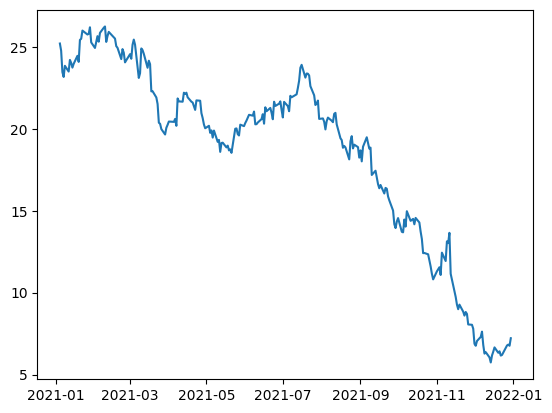

In [7]:
#Grafico de linhas mostrando o fechamento baseado em linha de tempo
plt.plot( dados.index, dados['Fechamento']);

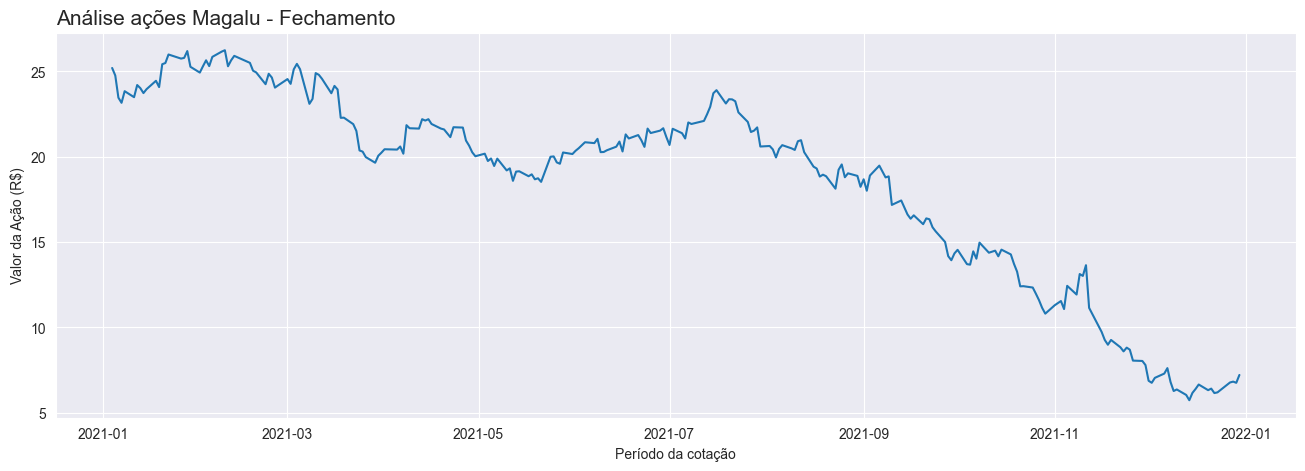

In [8]:
#Grafico de linhas mostrando o fechamento baseado em linha de tempo
sns.set_style('darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise ações Magalu - Fechamento', fontsize=15, loc='left')
plt.plot(dados.index, dados['Fechamento'])
plt.xlabel('Período da cotação')
plt.ylabel('Valor da Ação (R$)')
plt.show()

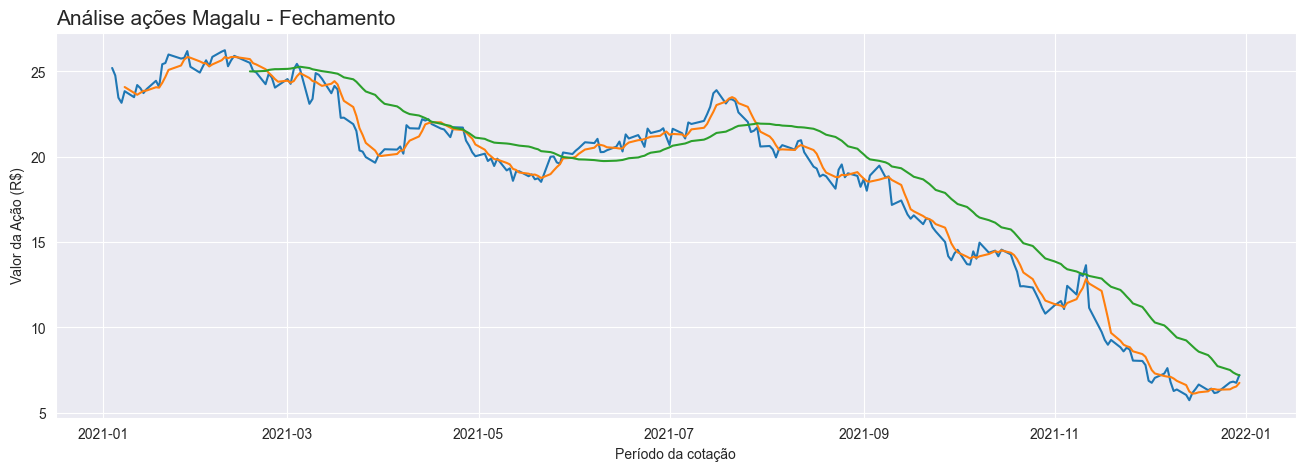

In [9]:
#Grafico de linhas usando media movel de 5 dias e media tendencia de 30 dias
media_movel = base_dados['Fechamento'].rolling(5).mean()
media_tendencia = base_dados['Fechamento'].rolling(30).mean()
sns.set_style('darkgrid')
plt.figure(figsize=(16,5))
plt.title('Análise ações Magalu - Fechamento', fontsize=15, loc='left')
plt.plot(dados.index, dados['Fechamento'])
plt.plot(dados.index, media_movel)
plt.plot(dados.index, media_tendencia)
plt.xlabel('Período da cotação')
plt.ylabel('Valor da Ação (R$)')
plt.show()

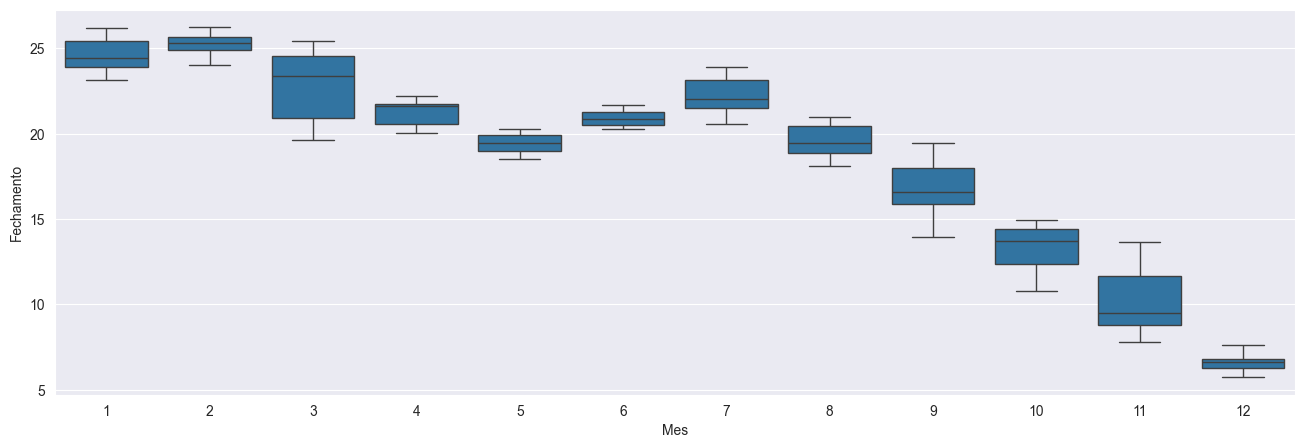

In [10]:
#Criando um grafico com boxplot mensal
base_dados['Mes'] = base_dados['Data'].dt.month

plt.figure(figsize=(16,5))
sns.boxplot(data=base_dados, x='Mes', y='Fechamento');


In [11]:
base_dados.groupby(['Mes']).describe()['Fechamento']

,count,mean,min,25%,50%,75%,max,std
Mes,,,,,,,,
1,19.0,24.644737,23.160000,23.900000,24.450001,25.455000,26.190001,0.960280
2,18.0,25.208889,24.049999,24.877501,25.299999,25.650000,26.240000,0.656021
3,23.0,22.855217,19.650000,20.940001,23.389999,24.559999,25.440001,1.976698
4,20.0,21.249000,20.030001,20.560000,21.625000,21.760000,22.200001,0.735297
5,21.0,19.430476,18.530001,18.969999,19.459999,19.900000,20.250000,0.564973
6,21.0,20.898095,20.270000,20.500000,20.889999,21.270000,21.670000,0.463116
7,21.0,22.232857,20.600000,21.530001,22.040001,23.120001,23.900000,0.977574
8,22.0,19.656818,18.129999,18.897500,19.485000,20.452499,20.969999,0.885827
9,21.0,16.746191,13.940000,15.870000,16.570000,18.010000,19.480000,1.628581


In [12]:
#Grafico mostrando abertura, fechamento, maior e menor valor das ações por dia

grafico = go.Figure(
        data=[
                go.Candlestick(
                    x = dados.index,
                    open = dados['Abertura'],
                    high = dados['Maior'],
                    low = dados['Menor'],
                    close = dados['Fechamento'],
                )
        ]
)
pio.show(grafico)